#Cover Page

**Developed by:**


**Ahmed Saber - 41810077**

#Import the dataset from drive

In [ ]:
!gdown --id 1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8

Downloading...
From: https://drive.google.com/uc?id=1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8
To: /content/winequality-white.csv
100% 264k/264k [00:00<00:00, 40.6MB/s]


#Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import StandardScaler,LabelEncoder

# show how the data looks like

In [ ]:
data = pd.read_csv('winequality-white.csv',sep=';')
data.head()

data['quality label'] = data['quality'].apply(lambda x: 'low' if x<=5 else 'medium' if x<=7 else 'high')
print(data[['quality','quality label']].value_counts().sort_index())
data.head()

quality  quality label
3        low                20
4        low               163
5        low              1457
6        medium           2198
7        medium            880
8        high              175
9        high                5
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


#Start Split the data and train

In [ ]:
encoder = LabelEncoder()
data['quality label'] = encoder.fit_transform(data['quality label'])

X = data.drop('quality',axis=1)
y = data.quality

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0, stratify=data['quality'])
print(len(X_train), "train +", len(X_test), "valid")



3918 train + 980 valid


#Using Naive_Bayes for trainning 

In [ ]:
classifier = GaussianNB()
classifier =classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  1,   0,   3,   0,   0,   0,   0],
       [  1,  14,  18,   0,   0,   0,   0],
       [  5,  24, 262,   0,   0,   0,   0],
       [  0,   0,   0, 282, 158,   0,   0],
       [  0,   0,   0,  43, 133,   0,   0],
       [  0,   0,   0,   0,   0,  35,   0],
       [  0,   0,   0,   0,   0,   1,   0]])

Text(33.0, 0.5, 'Truth')

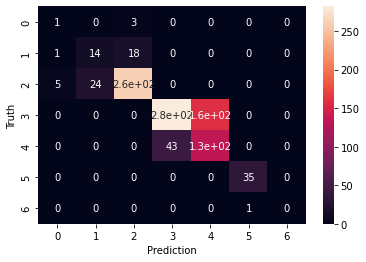

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Accurcy

In [ ]:
var="%"
print("Accuracy: %0.1f" % (classifier.score(X_test,y_test)*100), var[0])

Accuracy: 74.2 %


#find the mean square error

In [ ]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5316512590265255

In [ ]:
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

0.26632653061224487

# Classification Report

In [ ]:
#print(classification_report(y_test, y_pred, target_names=['1', '2', '3']))